**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, \
    KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [41]:

class MyKNeighborsClassifier(
    NeighborsBase,
    KNeighborsMixin,
    SupervisedIntegerMixin,
    ClassifierMixin
):
    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X, dtype = np.float64)
        self.y_train = y
        self.n_classes = 1 + np.max(y)

    def predict(self, X):
        return np.apply_along_axis(np.argmax, 1, self.predict_proba(np.array(X, dtype = np.float64)))

    def predict_proba(self, X):
        pr_proba = np.apply_along_axis(
            lambda x: self._count(x),
            1,
            self.y_train[
                np.argpartition(
                    self.distance(np.array(X, dtype = np.float64)), self.k, axis=1
                )[:, :self.k]
            ]
        )
        return pr_proba

    def score(self, X, y):
        return 1 - np.count_nonzero(self.predict(np.array(X, dtype = np.float64)) - y) / y.shape[0]

    def _count(self, arr):
        count = (np.unique(
                    np.concatenate((np.arange(self.n_classes), arr)),
                    return_counts=True
                )[1] - 1
            ) / self.k
        return count

    def distance(self, X):
        return np.sqrt(
            np.sum(X ** 2, axis=1)[:, np.newaxis] +
            np.sum(self.X_train ** 2, axis=1) -
            2 * np.dot(X, self.X_train.T)
        )



**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

CPU times: user 1.49 ms, sys: 1.45 ms, total: 2.94 ms
Wall time: 6.19 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

CPU times: user 56 µs, sys: 12 µs, total: 68 µs
Wall time: 62 µs


In [9]:
%time clf.predict(X_test)

CPU times: user 1.31 ms, sys: 720 µs, total: 2.03 ms
Wall time: 2.94 ms


array([2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2])

In [10]:
%time my_clf.predict(X_test)

CPU times: user 1.94 ms, sys: 1.31 ms, total: 3.26 ms
Wall time: 3.89 ms


array([2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2])

In [11]:
%time clf.predict_proba(X_test)

CPU times: user 779 µs, sys: 210 µs, total: 989 µs
Wall time: 819 µs


array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [12]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.92 ms, sys: 1.22 ms, total: 3.14 ms
Wall time: 2.16 ms


array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [13]:
clf.score(X_test, y_test)

0.8

In [14]:
my_clf.score(X_test, y_test)

0.8

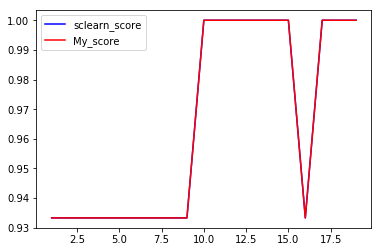

In [15]:
# Задание 3
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
n=20
k=range(1,n)
c=np.zeros(n-1)
mc=np.zeros(n-1)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    mc[i-1]=my_clf.score(X_test, y_test)
    #print mc
    c[i-1]=clf.score(X_test, y_test)
plt.plot(k, c, color='blue', label='sclearn_score')
plt.plot(k, mc, color='red', label='My_score')
plt.legend()

**MNIST**

In [16]:
mnist = fetch_mldata('MNIST original')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [43]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 32.2 s, sys: 519 ms, total: 32.7 s
Wall time: 33.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [44]:
%time my_clf.fit(X_train, y_train)

CPU times: user 84.2 ms, sys: 110 ms, total: 194 ms
Wall time: 194 ms


In [21]:
%time clf.predict(X_test)

CPU times: user 9min 35s, sys: 4.64 s, total: 9min 40s
Wall time: 9min 50s


array([3., 6., 2., ..., 2., 5., 3.])

In [45]:
%time my_clf.predict(X_test)

CPU times: user 50.5 s, sys: 28.6 s, total: 1min 19s
Wall time: 57.7 s


array([1, 8, 5, ..., 4, 4, 4])

In [23]:
%time clf.predict_proba(X_test)

CPU times: user 9min 12s, sys: 2.04 s, total: 9min 14s
Wall time: 9min 17s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
%time my_clf.predict_proba(X_test)

CPU times: user 50.2 s, sys: 27.2 s, total: 1min 17s
Wall time: 58.2 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
clf.score(X_test, y_test)

0.9651428571428572

In [47]:
my_clf.score(X_test, y_test)

0.9662857142857143

Задание 5

In [ ]:
# seaborn
# Библиотека визуализации статистической графики, построена на основе matplotlib.
# обеспечивает высокоуровневый интерфейс для рисования статистической графики.

# matplotlib
# Библиотека для визуализации данных, 2D и 3D графики

# train_test_split
# Метод из sklearn, позволяющий разделять датасет на тестовые и обучающие данные

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Magic method загружающий соответствующий модуль

# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Стандартизирует признаки, вычитая среднее и перенормируя так, чтобы дисперсия была единичной

# ClassifierMixin
# Класс mixin с методом score, выполняющим количественную оценку качества классификации

# NeighborsBase
# Базовый класс для KNeighborsClassifier

# KNeighborsMixin
# Миксин содержащий метод поиска k ближайших соседей (метод kneighbors)

# SupervisedIntegerMixin
# Содержит метод fit